<a href="https://colab.research.google.com/github/amantha6/flight-fare-detection/blob/main/flight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

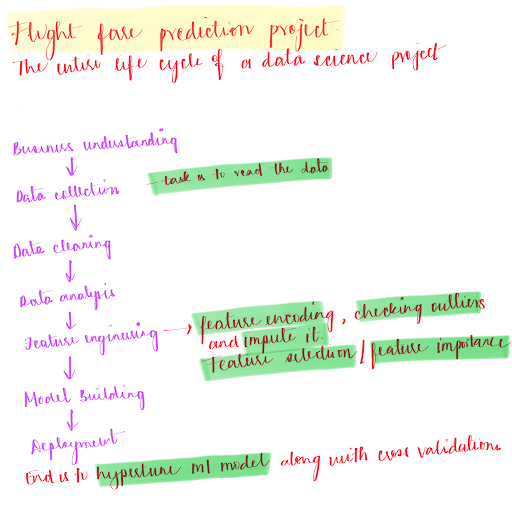

In [1]:
## import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Collection**



In [15]:
train_data=pd.read_excel("/content/Data_Train.xlsx")

# **Data Cleaning (missing values)**
## **Data Overview:**

The dataset contains flight information with 11 features:

Airline

Date_of_Journey

Source

Destination

Route

Dep_Time (Departure Time)

Arrival_Time

Duration

Total_Stops

Additional_Info

Price (target variable)


```



In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Two features have missing values

In [17]:
train_data.isnull().sum()
train_data.dropna(inplace=True) #update the training data hence leveraging the training data
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


# **Data Cleaning (preprocessing)**
#### From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,because our
model will not be able to understand these string values,it just understand Time-stamp
For this we require pandas to_datetime to convert object data type to datetime dtype.
Date of Journey cannot be a String data type. Likewise for arrival and departure time (datetime64[ns])


In date-time , we have 4 data-types in Pandas :
datetime64[ns] or datetime64[ns, tz]  or datetime64[ns, UTC] or dtype('<M8[ns]')
     means ‘big-endian’  , < is little-endian
     imagine , data represented a single unsigned 4-byte little-endian integer, the dtype string would be <u4..
     (u is type-character code for unsigned integer)
     
where ,   UTC = Coordinated Universal Time
          ns  = nano second
          tz  = time zone
          M =  M is a character of Data-time , just like int we have i for "Integer" ,


datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype , ns is basicaly nano second..
Both are similar , it entirely how your numpy was compiled..

np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')



In [18]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])
import warnings
from warnings import filterwarnings
filterwarnings("ignore")
data=train_data.copy()
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)


In [19]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [20]:
data["Journey_day"] = data['Date_of_Journey'].dt.day
data["Journey_month"] = data['Date_of_Journey'].dt.month
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [21]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-20 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-20 05:50:00,2025-02-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-20 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


This is exactly the right approach for datetime features. Machine learning models can't effectively work with string datetime values, so converting them to numerical representations is essential.

Clean the departure time feature and arrival time feature and then extract the derived features.
Why? Because the algorithm needs to understand what the feature is all about.


In [22]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)
extract_hour_min(data , "Dep_Time")
extract_hour_min(data , "Arrival_Time")
## we have extracted derived attributes from ['Arrival_Time' , "Dep_Time"] , so lets drop both these features ..
cols_to_drop = ['Arrival_Time' , "Dep_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True )
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


Converted date and time columns to datetime objects
Extracted day, month, and year from journey dates
Extracted hours and minutes from departure and arrival times
Dropped the original datetime columns after extracting useful features

# **Data Analysis**


Let us analyse when most of the flights take off

In [23]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

<Axes: xlabel='Dep_Time_hour'>

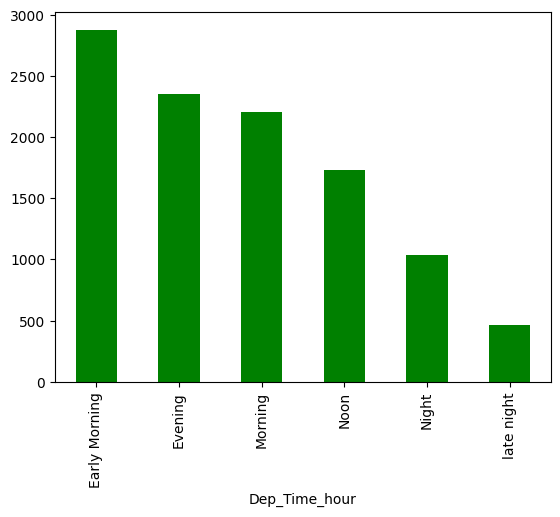

In [24]:
#### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time
    and convert into appropriate format.

    '''

    if (x>4) and (x<=8):
        return "Early Morning"

    elif (x>8) and (x<=12):
        return "Morning"

    elif (x>12) and (x<=16):
        return "Noon"

    elif (x>16) and (x<=20):
        return "Evening"

    elif (x>20) and (x<=24):
        return "Night"

    else:
        return "late night"
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="g")

In [25]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

In [26]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
go_offline(connected=True)


In [29]:
import plotly.express as px
temp_series = data['Dep_Time_hour'].apply(flight_dep_time)
from IPython.display import display
fig = px.bar(temp_series.value_counts(), title='Flight Departure Times')
fig.show(renderer="colab")


In [30]:

data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


Pre-process Duration Feature & extract meaningful features from it.
 -->> Once we pre-processed our Duration feature , lets extract Duration hours and minute from duration..
    
    -->> As my ML model is not able to understand this duration as it contains string values ,
    thats why we have to tell our ML Model that this is hour & this is minute for each of the row .

In [31]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'

    return x

In [32]:
data['Duration'] = data['Duration'].apply(preprocess_duration)
data['Duration']

,Duration
0,2h 50m
1,7h 25m
2,19h 0m
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h 0m
10681,2h 40m


'''
    Now after pre-processing duration feature , still my ml_model is not able to understand duration
    because it is string data so any how we have to convert it into numerical(integer of float) values

'''

In [33]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))
pd.to_timedelta(data["Duration"]).dt.components.hours
data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours
data["Duration_minute"] = pd.to_timedelta(data["Duration"]).dt.components.minutes

Lets Analyse whether Duration impacts Price or not ?

In [34]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)

In [35]:
data['Duration_total_mins']

,Duration_total_mins
0,170
1,445
2,1140
3,325
4,285
...,...
10678,150
10679,155
10680,180
10681,160


In [36]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

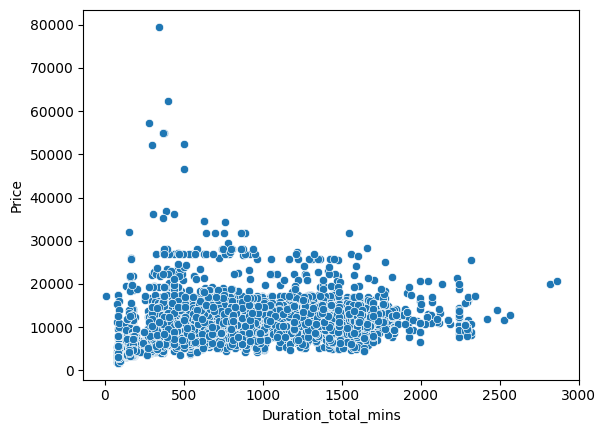

In [37]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data)

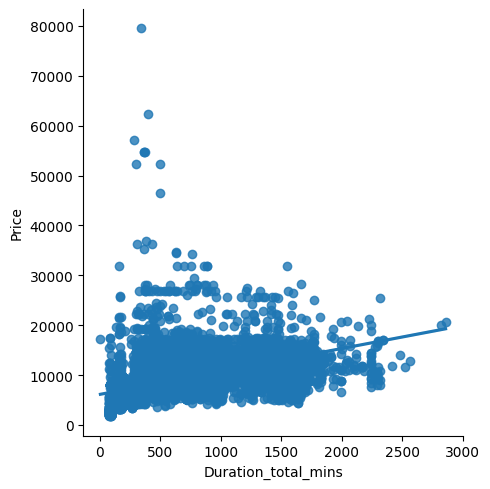

In [38]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

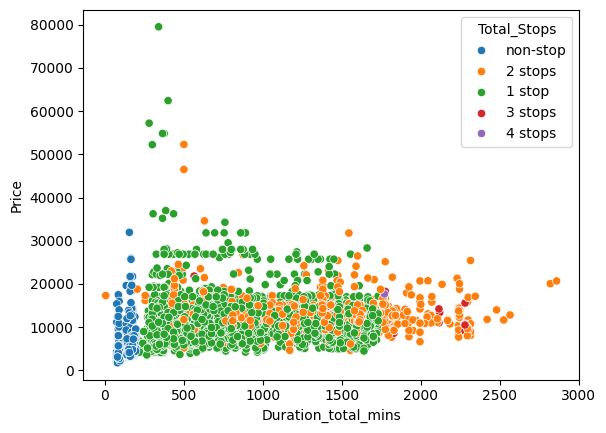

In [39]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)


Non stops flights take less duration while their fare is also low, then as the stop increases,
duration also increases and price also increases(in most of the cases)



Next Analysis: On which route is Jet Airways extremely used?

In [40]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

,0
Route,
CCU → BOM → BLR,930
DEL → BOM → COK,875
BLR → BOM → DEL,385
BLR → DEL,382
CCU → DEL → BLR,300
BOM → HYD,207
DEL → JAI → BOM → COK,207
DEL → AMD → BOM → COK,141
DEL → IDR → BOM → COK,86


Next analysis: Airline vs Price

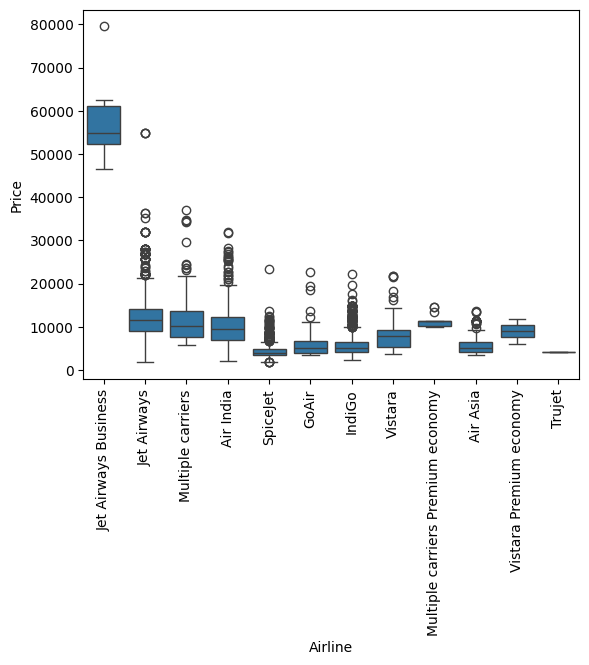

In [41]:
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

**One Hot Encoding**
One-hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. It converts each categorical value into a new categorical column and assigns a 1 or 0 (True/False). Each integer represents the presence of the factor in a logical, binary manner.

Here's how you can apply one-hot encoding to multiple categorical columns in your dataset using Python's pandas library, which is more efficient and straightforward than applying a lambda function for each unique value.

Use pd.get_dummies(): This is a powerful function from pandas that converts categorical variable(s) into dummy/indicator variables.

In [44]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2019,22,20,1,10,2,50,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,2019,5,50,13,15,7,25,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,2019,9,25,4,25,19,0,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,2019,18,5,23,30,5,25,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,2019,16,50,21,35,4,45,4,45,285


In [46]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Applying one-hot encoding to multiple categorical columns
categorical_cols = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']  # list of all categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Display the new DataFrame structure
data_encoded.head()


,Date_of_Journey,Duration,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,2019-03-24,2h 50m,3897,24,3,2019,22,20,1,10,...,False,False,False,False,False,False,False,False,True,False
1,2019-05-01,7h 25m,7662,1,5,2019,5,50,13,15,...,False,False,False,False,False,False,False,False,True,False
2,2019-06-09,19h 0m,13882,9,6,2019,9,25,4,25,...,False,False,False,False,False,False,False,False,True,False
3,2019-05-12,5h 25m,6218,12,5,2019,18,5,23,30,...,False,False,False,False,False,False,False,False,True,False
4,2019-03-01,4h 45m,13302,1,3,2019,16,50,21,35,...,False,False,False,False,False,False,False,False,True,False


**Target Guided Mean Encoding**
This method is particularly useful when the categorical feature has many unique values or when data dimensionality is a concern. The goal is to replace each category within the feature with the mean value of the target variable for that category. This provides a numerical transformation that incorporates information about the target, potentially improving model performance by introducing a useful signal.


---
Steps for Target Guided Mean Encoding
Group by the Feature: First, group the data by the categorical feature and calculate the mean of the target variable (e.g., 'Price') for each category.

Sort the Mean Values: Optionally, sort these means to assign a rank or directly use the mean as an encoding value.

Map the Mean Values Back: Replace each category in the original data with its corresponding mean target value.


In [47]:
import pandas as pd

# Example data loading (replace with your actual data loading method)
# data = pd.read_csv('your_dataset.csv')

# Calculate the mean price for each airline
mean_encoded_airline = data.groupby('Airline')['Price'].mean().sort_values()

# Map the mean price to each airline in the dataset
data['Airline_Encoded'] = data['Airline'].map(mean_encoded_airline)

# Display the first few rows to check the new column
print(data[['Airline', 'Airline_Encoded']].head())


       Airline  Airline_Encoded
0       IndiGo      5673.682903
1    Air India      9612.427756
2  Jet Airways     11643.923357
3       IndiGo      5673.682903
4       IndiGo      5673.682903


In [48]:
import pandas as pd

# Assuming data is loaded here
# data = pd.read_csv('your_dataset.csv')

# Example of preprocessing, assume 'New Delhi' and 'Delhi' should be treated as the same category
data['Destination'] = data['Destination'].replace(['New Delhi'], 'Delhi')

# Calculate the mean price for each destination
mean_encoded_destination = data.groupby('Destination')['Price'].mean().sort_values()

# Create a dictionary to map each destination to its mean price
destination_dict = {key: rank for rank, key in enumerate(mean_encoded_destination.index, 0)}

# Map the mean price to each destination in the dataset
data['Destination_Encoded'] = data['Destination'].map(destination_dict)

# Display the results
print(data[['Destination', 'Destination_Encoded']].head())


  Destination  Destination_Encoded
0       Delhi                    2
1    Banglore                    3
2      Cochin                    4
3    Banglore                    3
4       Delhi                    2


 Label (Manual) Encoding

This method is a way to transform categorical data that has a natural ordinal relationship into a numeric format that can be better understood and used by machine learning algorithms.


In [49]:
import pandas as pd

# Sample data loading - replace with actual data loading
# data = pd.read_csv('path_to_your_data.csv')

# Display unique values in the 'Total_Stops' column
print(data['Total_Stops'].unique())

# Creating a dictionary for manual label encoding
stop = {'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

# Applying the label encoding to the 'Total_Stops' column
data['Total_Stops'] = data['Total_Stops'].map(stop)

# Displaying the transformed data
print(data[['Total_Stops']].head())


['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
   Total_Stops
0            0
1            2
2            2
3            1
4            1


# **Outlier Detection:**
Distribution Plot and Box Plot: These are used to identify outliers by visually showing the distribution of the data.

The Distribution Plot (Histogram) shows how data points are distributed along the range of values, indicating where the bulk of data lies and where rare/extreme values exist.

The Box Plot provides a clear picture of the median, quartiles, and the presence of outliers (shown as points beyond the whiskers).

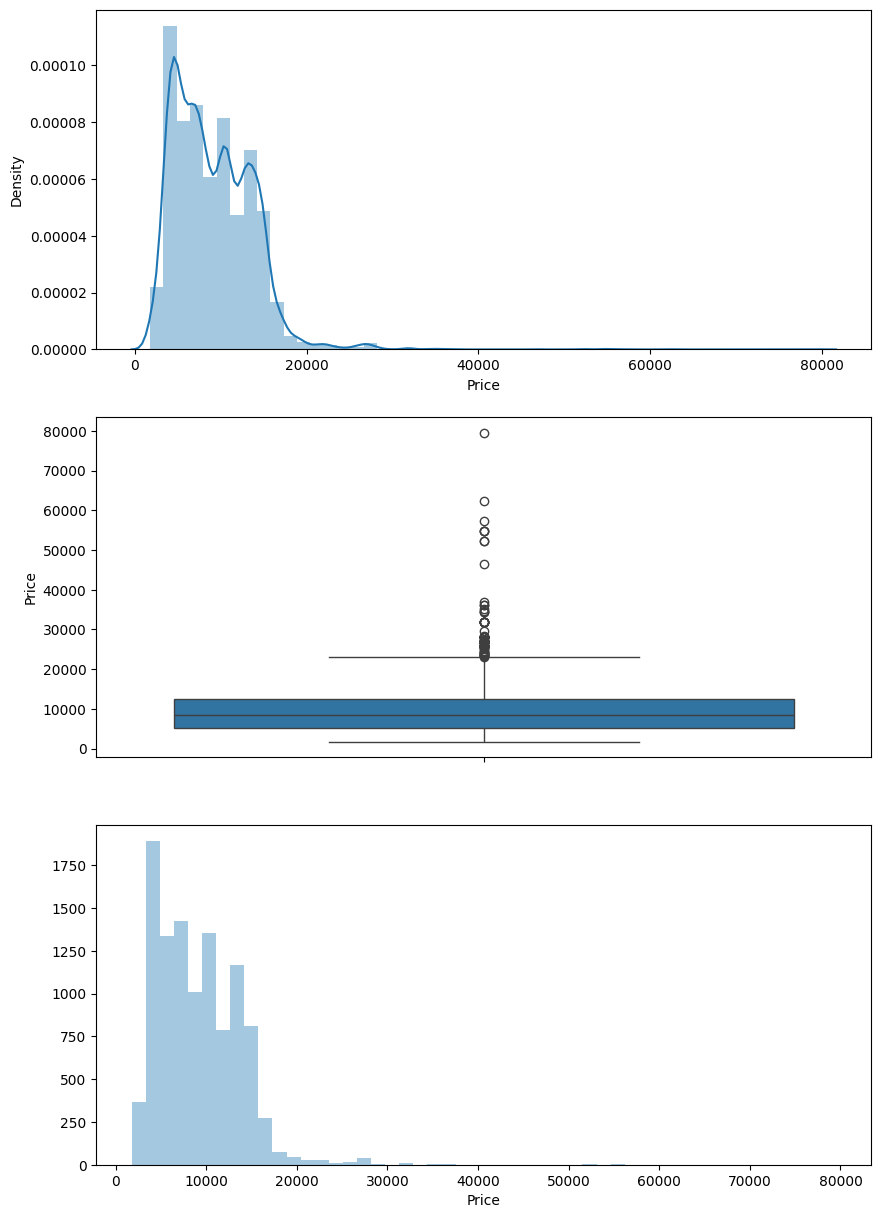

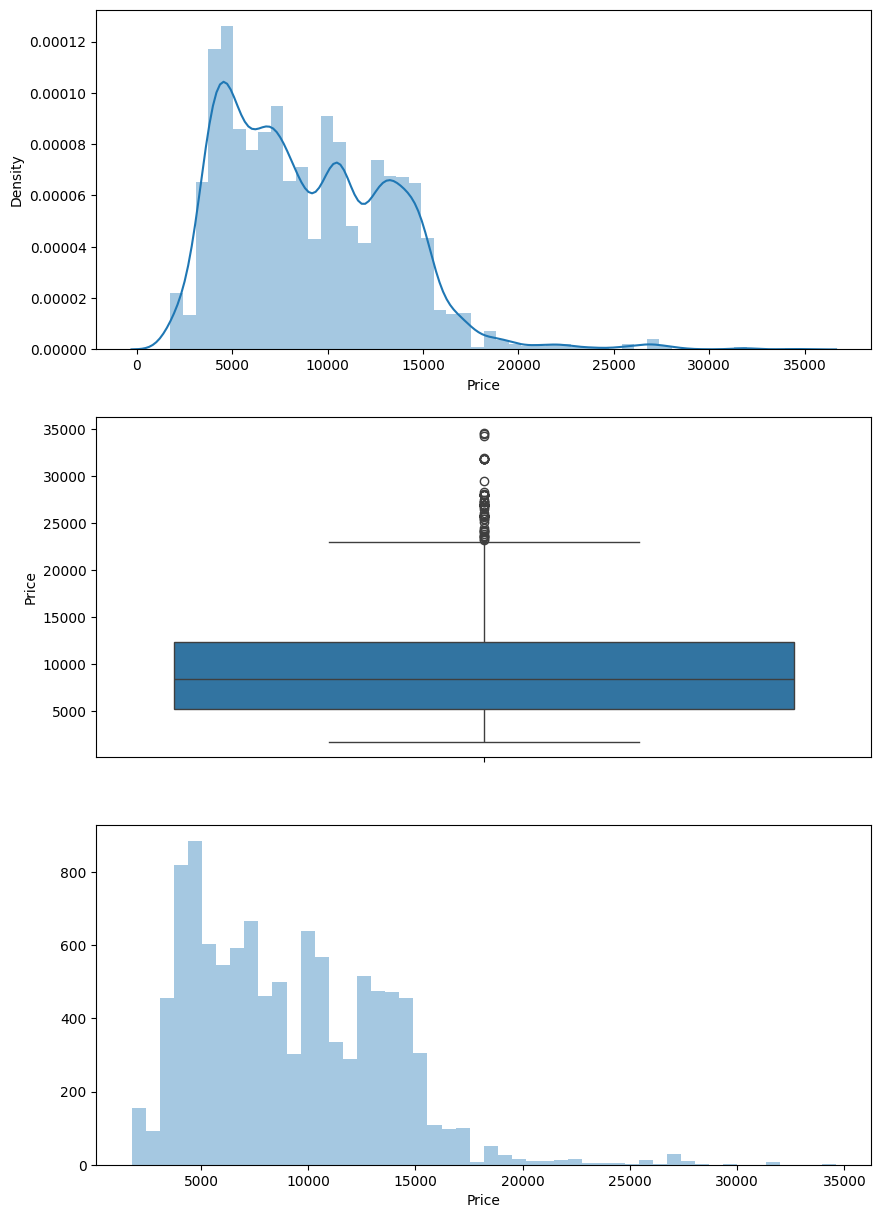

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
# data = pd.read_csv('file_path')

# Define a function to plot distribution and box plot
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)

# Plotting 'Price' to detect outliers
plot(data, 'Price')

# Calculating IQR and defining outliers
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3 - q1
maximum = q3 + 1.5 * iqr
minimum = q1 - 1.5 * iqr

# Handling outliers by replacing them with the median
median_price = data['Price'].median()
data['Price'] = np.where(data['Price'] > 35000, median_price, data['Price'])

# Re-plot to see the effect of handling outliers
plot(data, 'Price')


Density and Histogram Plots:

These plots reveal the distribution of ticket prices. Most of the data seems to cluster within a lower price range, indicating common fare prices, with fewer occurrences as prices increase.
Box Plot:

The box plot underscores this distribution by clearly showing the median price, the interquartile range (IQR), and outliers. The presence of outliers at higher price points suggests that there are some unusually expensive tickets. These could be due to various factors like business class tickets, last-minute bookings, or flights to distant or less frequently served destinations.
IQR Calculation and Outlier Identification:

By calculating the IQR and defining thresholds for outliers (1.5 times the IQR above the third quartile and below the first quartile), you quantify what constitutes an unusually low or high price. This helps in understanding how diverse the ticket pricing can be and which values are exceptionally different from the norm.
Treatment of Outliers:

The strategy to replace extreme price values (those identified as outliers) with the median price helps to stabilize the dataset. This approach is beneficial for predictive modeling and other statistical analyses where outliers could lead to misleading results.